# NLP_applied_in_Insurance: Exploratory_Data_Analysis

# Upload Libraries

In [1]:
!pip install langdetect

     |████████████████████████████████| 981 kB 884 kB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=02777e7815ae42cf135eaa7bbc1cd73c89677ef0a924ae9c31a447cc2744160b
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [2]:
from numpy.random import seed
seed(1)
import tensorflow.keras
tensorflow.random.set_seed(2)
import os
os.environ['PYTHONHASHSEED'] = str(0)
TF_DETERMINISTIC_OPS=1

import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
import re
import string
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec 
import langdetect 
import spacy
from sklearn import feature_extraction, manifold
from gensim.parsing.preprocessing import remove_stopwords
import gensim.downloader as gensim_api
import gensim
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


# Requirements

In [3]:
print(np.__version__)

1.19.5


In [4]:
print(pd.__version__)

1.3.4


In [5]:
print(sklearn.__version__)

0.23.2


In [6]:
print(sns.__version__)

0.11.2


In [7]:
print(tensorflow.keras.__version__)

2.6.0


# Upload data set

In [8]:
# Reading File
df_train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')

# Exploratory Data Analysis

### Have a peek of data set

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [10]:
df_train.shape

(7613, 5)

In [11]:
df_train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [12]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [13]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,7613.0,NaN,NaN,NaN,5441.934848,3137.11609,1.0,2734.0,5408.0,8146.0,10873.0
keyword,7552,221,fatalities,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,5080,3341,USA,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of T...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,7613.0,NaN,NaN,NaN,0.42966,0.49506,0.0,0.0,0.0,1.0,1.0


### Target variable analysis 

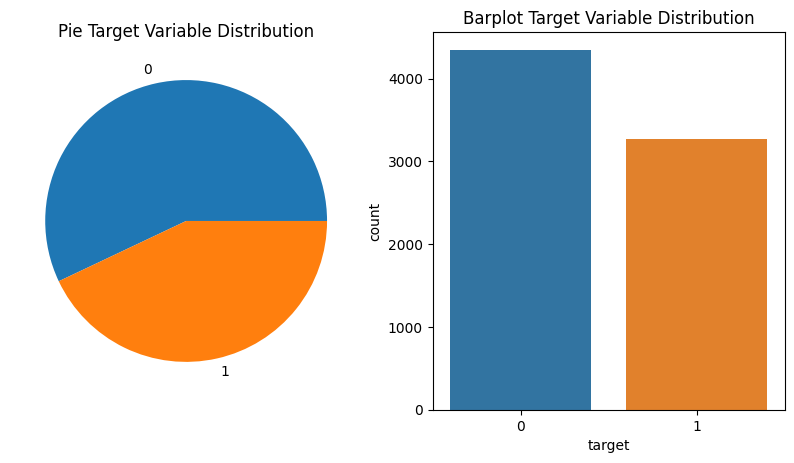

In [14]:
# Plot the target variable 
fig, axes = plt.subplots(ncols=2, figsize=(10, 5), dpi=100)
pieplot = df_train.groupby('target').count()['id'].plot(kind='pie',ax=axes[0]).set_title("Pie Target Variable Distribution")
barplot = sns.countplot(x=df_train['target'], data=df_train, ax=axes[1]).set_title("Barplot Target Variable Distribution")

axes[0].set_ylabel('')

plt.show()

In [15]:
# Summarize the class distribution 
count = pd.crosstab(index = df_train['target'], columns="count")
percentage = pd.crosstab(index = df_train['target'], 
                         columns="frequency")/pd.crosstab(index = df_train['target'], columns="frequency").sum()
pd.concat([count, percentage], axis=1)

col_0,count,frequency
target,,
0,4342,0.57034
1,3271,0.42966


### Keyword and Location variable analysis

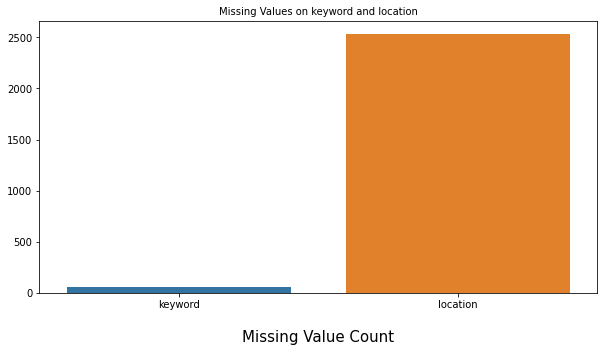

In [16]:
missing_cols = ['keyword', 'location']

fig = plt.figure(figsize = (10, 5))
sns.barplot(x=df_train[missing_cols].isnull().sum().index, y=df_train[missing_cols].isnull().sum().values)
plt.xlabel('Missing Value Count', size=15, labelpad=20)
plt.title('Missing Values on keyword and location', fontsize=10)

plt.show()


In [17]:
df_train['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

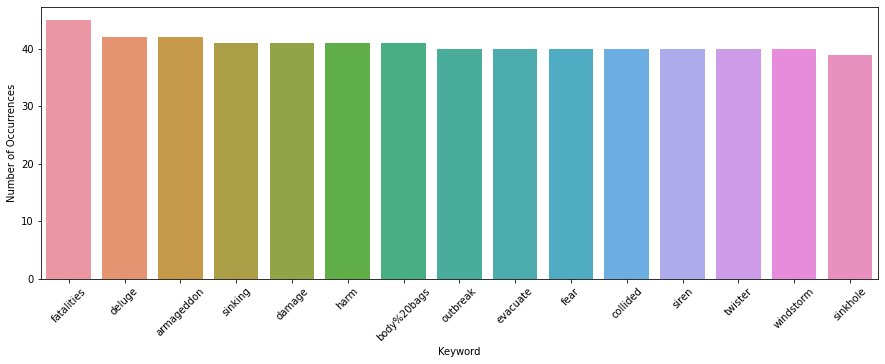

In [18]:
cnt_keyword = df_train['keyword'].value_counts()
top_15 = cnt_keyword.nlargest(15)
plt.figure(figsize=(15,5))
sns.barplot(x=top_15.index, y=top_15.values)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Keyword', fontsize=10)
plt.xticks(rotation=45)
plt.show()

In [19]:
df_train['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

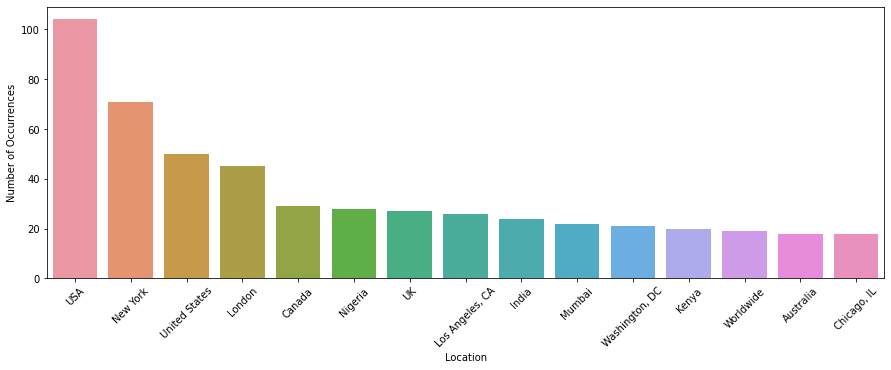

In [20]:
cnt_location = df_train['location'].value_counts()
top_15 = cnt_location.nlargest(15)
plt.figure(figsize=(15,5))
sns.barplot(x=top_15.index, y=top_15.values)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Location', fontsize=10)
plt.xticks(rotation=45)
plt.show()

### Language Detection

In [21]:
txt = df_train["text"].iloc[0]
print(txt, " --> ", langdetect.detect(txt))

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all  -->  en


In [22]:
df_train['lang'] = df_train["text"].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")
df_train.head()

,id,keyword,location,text,target,lang
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,en
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,en
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,en
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,en
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,en


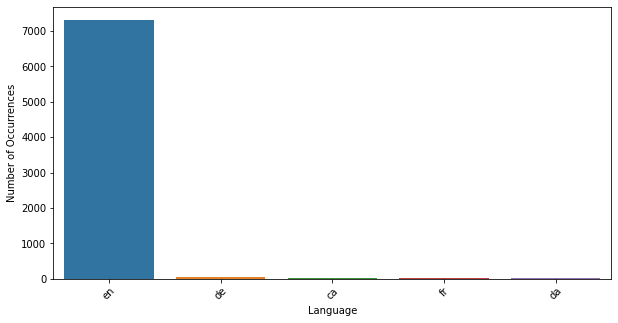

In [23]:
cnt_language = df_train['lang'].value_counts()
top_5 = cnt_language.nlargest(5)
plt.figure(figsize=(10,5))
sns.barplot(x=top_5.index, y=top_5.values)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Language', fontsize=10)
plt.xticks(rotation=45)
plt.show()

### Length Analysis

In [24]:
# word_count
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
all_stop_words = stopwords.words('english')
df_train['stop_word_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in all_stop_words]))

# url_count
df_train['url_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# hashtag_count
df_train['hashtag_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_train['mention_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))


<Figure size 360x360 with 0 Axes>

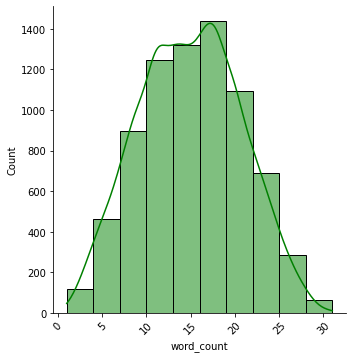

<Figure size 360x360 with 0 Axes>

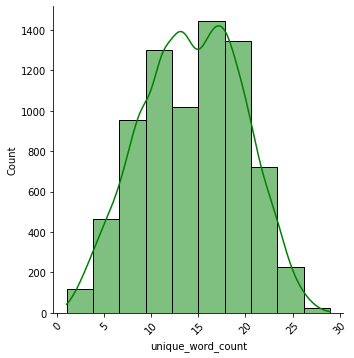

<Figure size 360x360 with 0 Axes>

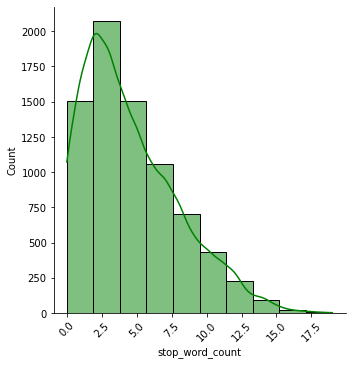

<Figure size 360x360 with 0 Axes>

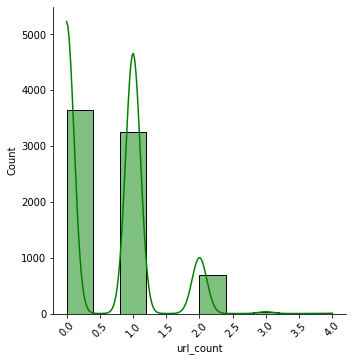

<Figure size 360x360 with 0 Axes>

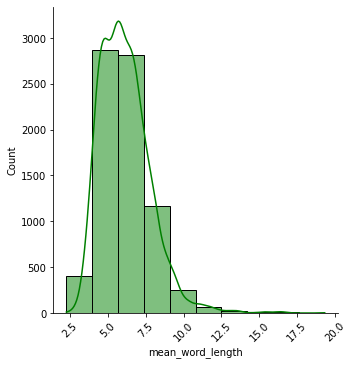

<Figure size 360x360 with 0 Axes>

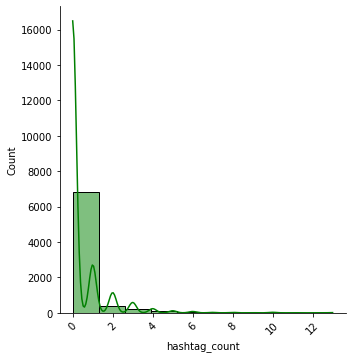

<Figure size 360x360 with 0 Axes>

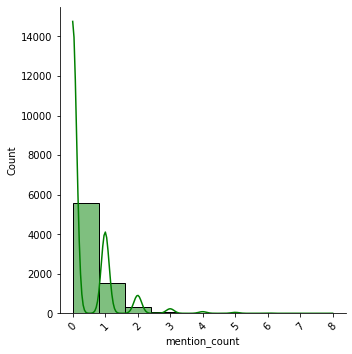

In [25]:
text_length = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                 'hashtag_count', 'mention_count']

for col in text_length:
    
    plt.figure(figsize=(5,5))
    sns.displot(x=df_train[col], bins=10, color='green', kde=True)
    plt.xticks(rotation=45)
    plt.show()

### WordCloud

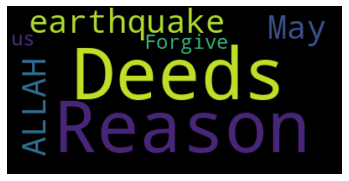

In [26]:
# Start with one review:
text = df_train.text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()